In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
%matplotlib inline


# Автостопом по машинному обучению на Python

<a href="https://tproger.ru/translations/hitchhikers-guide-to-ml/"> Machine Learning Introduction </a>

![linear%20reg%20pic.png](attachment:linear%20reg%20pic.png)

In [2]:
import warnings
#warnings.filterwarnings("ignore")

In [3]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
df = pd.read_excel('C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_df.xlsx')
df.columns = ['X', 'Y', 'Z']  # присвоит название колонкам, соттветственно
df.head(100)
print(df)

     X      Y  Z
0    2   30.0  1
1   19   46.2  2
2   13  200.0  3
3  124  422.2  4
4   40  119.4  5
5   55   88.0  6
6   70  300.0  7
7  100  400.0  8


In [5]:
df.X[:].head(100) # as the same as df['X'].head(100)

0      2
1     19
2     13
3    124
4     40
5     55
6     70
7    100
Name: X, dtype: int64

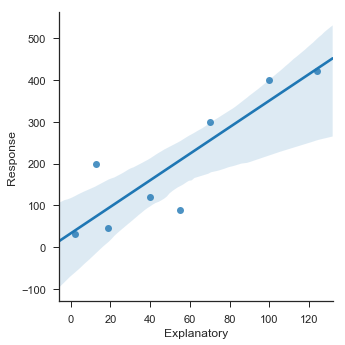

In [6]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('X','Y', data=df)
plt.ylabel('Response')
plt.xlabel('Explanatory')

In [7]:
linear = linear_model.LinearRegression()
trainX = np.asarray(df.X[5:len(df.X)]).reshape(-1, 1)
trainY = np.asarray(df.Y[5:len(df.Y)]).reshape(-1, 1)
testX = np.asarray(df.X[:5]).reshape(-1, 1)
testY = np.asarray(df.Y[:5]).reshape(-1, 1)

Important functions to keep in mind while fitting a linear regression model are:


In [8]:
# fits a linear model ; Train the model using the training sets and check score      
linear.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Returns the coefficient of determination (R^2). 
# A measure of how well observed outcomes are replicated by the model, 
# as the proportion of total variation of outcomes explained by the model. 
linear.score(trainX, trainY)

0.85228739531113984

In [10]:
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print('R² Value: \n', linear.score(trainX, trainY))
predicted = linear.predict(testX)
#df.X[5:len(df.X)].reshape(1, -1)


Coefficient: 
 [[ 6.41904762]]
Intercept: 
 [-218.76190476]
R² Value: 
 0.852287395311


In [11]:
print (predicted)
df_PR = pd.DataFrame({ 'X' : [float(i) for i in testX],
                     'Y' : [float(j) for j in predicted] })
df_PR.head(100)

[[-205.92380952]
 [ -96.8       ]
 [-135.31428571]
 [ 577.2       ]
 [  38.        ]]


,X,Y
0,2.0,-205.923810
1,19.0,-96.800000
2,13.0,-135.314286
3,124.0,577.200000
4,40.0,38.000000


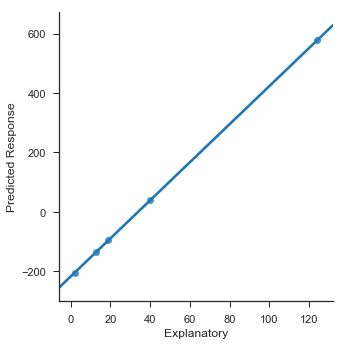

In [12]:
sns.lmplot('X','Y', data=df_PR)
plt.ylabel('Predicted Response')
plt.xlabel('Explanatory')

In [13]:
z = np.array([[1, 2, 3, 4],
         [5, 6, 7, 8],
         [9, 10, 11, 12]])
z.shape


(3, 4)

In [14]:
z.reshape(-1)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [15]:
z.reshape(1, -1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [16]:
z.reshape(2, -1)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [17]:
z.reshape(-1, 1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

# How to run Linear regression in Python scikit-Learn

<a href="http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/"> BIG DATA</a> 


Boston Housing data set, the data set  contains information about the housing values in suburbs of Boston. This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository.

In [18]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [19]:
boston.data.shape

(506, 13)

In [20]:
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [21]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [22]:
pd.DataFrame(boston.data).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [23]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
boston.target[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [25]:
#print (boston)